# Linear Regression Model and Analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
%matplotlib inline

# Dataset
Student Perforamance Dataset (synthetic dataset) The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. \
The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

Variables:
Hours Studied: The total number of hours spent studying by each student.\
Previous Scores: The scores obtained by students in previous tests.\
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).\
Sleep Hours: The average number of hours of sleep the student had per day.\
Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
Performance Index: A measure of the overall performance of each student.\
The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.

In [2]:
student = pd.read_csv('Student_Performance.csv')
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   hours                             10000 non-null  int64 
 1   previous                          10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   performance                       10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


# Sampling
Take sample of 250 students by random. The dataset consist of 10000 students.
We can also use all data but for the purpose of study, let's take this sample number.

In [3]:
# create new column 'index' and make 'index' as index
# create new table for  sample data

sample = student.sample( n = 250 )
sample["index"] = np.arange(0,250)
sample = sample.set_index('index')
sample.head()

,hours,previous,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,performance
index,,,,,,
0,3,87,Yes,8,7,68
1,9,53,Yes,6,9,49
2,7,91,Yes,4,9,83
3,6,63,Yes,4,8,51
4,8,73,No,5,3,66


In [4]:
# change data type from category to number
# change yes and no to 1 and 0 for extracurricular activities

sample['Extracurricular Activities'] = sample['Extracurricular Activities'] .astype('category')
sample['Extracurricular Activities'] = sample['Extracurricular Activities'] .cat.codes
sample.head()

,hours,previous,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,performance
index,,,,,,
0,3,87,1,8,7,68
1,9,53,1,6,9,49
2,7,91,1,4,9,83
3,6,63,1,4,8,51
4,8,73,0,5,3,66


# Descriptive Statistics
Count, mean , standard deviation, min, percentile of sample data set

In [5]:
# simple linear regression
# previous test score as independent variable 
# performance index as dependent variable 
x = sample['previous']
y = sample['performance']
sample.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hours,250.0,4.472,2.535138,1.0,2.00,4.0,6.75,9.0
previous,250.0,67.668,17.540480,40.0,53.25,64.5,84.75,99.0
Extracurricular Activities,250.0,0.524,0.500426,0.0,0.00,1.0,1.00,1.0
Sleep Hours,250.0,6.368,1.714741,4.0,5.00,6.0,8.00,9.0
Sample Question Papers Practiced,250.0,4.760,2.882993,0.0,2.00,5.0,7.00,9.0
performance,250.0,51.988,19.842043,12.0,37.00,51.0,68.00,96.0


# Scipy stats linear regression
Calculate a linear least-squares regression for two sets of measurements.

In [12]:
# use scipy.stats library to get linear regression equation, r value and p value
# this is much easy than doing the linear regression by pure python

linear_regression = stats.linregress(x,y)
linear_regression

LinregressResult(slope=1.0449887092249357, intercept=-18.72429597583296, rvalue=0.9237760244930957, pvalue=2.2538687084946864e-105, stderr=0.027506930054233585, intercept_stderr=1.9226135968733074)

In [15]:
# get the coefficient and constant of the regression
# get R squared value
b0 = linear_regression.intercept
b1 = linear_regression.slope
r_squared = linear_regression.rvalue
p_value = linear_regression.pvalue
error = linear_regression.stderr
intercept_error = linear_regression.intercept_stderr
print(f'''
The linear regression equation for the independent and dependent variable is 
{round(b1,4)}x + {round(b0,4)}
The r-squared value is {round(r_squared,4)}
p-value is {(p_value)}''')


The linear regression equation for the independent and dependent variable is 
1.045x + -18.7243
The r-squared value is 0.9238
p-value is 2.2538687084946864e-105


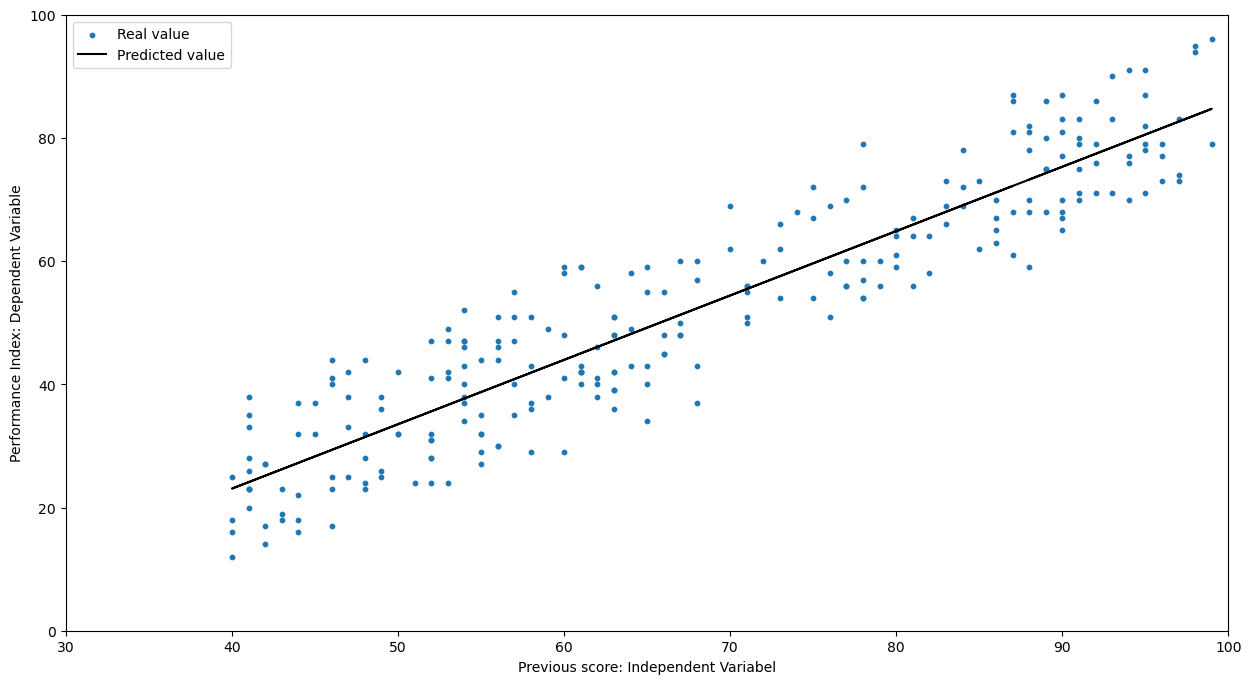

In [8]:
prediction_score = []
for i in x:
    y_predict = linear_regression.slope * i + linear_regression.intercept
    prediction_score.append(y_predict)


plt.figure(figsize = (15,8))
plt.scatter(x, y, s = 10 , alpha = 1, label = 'Real value')
plt.plot(x, prediction_score, color = 'black', label = 'Predicted value')
ax = plt.gca()
ax.set_xlim([30, 100])
ax.set_ylim([0, 100])
plt.xlabel('Previous score: Independent Variabel')
plt.ylabel('Performance Index: Dependent Variable')
plt.legend()
plt.show()